In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

In [2]:
store = pd.read_csv(
    "data/store.csv"
)
new_train = pd.read_csv("data/new_train.csv",index_col=0)
data = store.merge(new_train,on="Store")

data.head()

/Users/jack/code/dsr/dsr_env/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3057: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,5,2015-07-31,5263,555,1,1,0,1
1,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,4,2015-07-30,5020,546,1,1,0,1
2,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,3,2015-07-29,4782,523,1,1,0,1
3,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,2,2015-07-28,5011,560,1,1,0,1
4,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,1,2015-07-27,6102,612,1,1,0,1


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 864627 entries, 0 to 864626
Data columns (total 18 columns):
Store                        864627 non-null int64
StoreType                    864627 non-null object
Assortment                   864627 non-null object
CompetitionDistance          862396 non-null float64
CompetitionOpenSinceMonth    589729 non-null float64
CompetitionOpenSinceYear     589729 non-null float64
Promo2                       864627 non-null int64
Promo2SinceWeek              431040 non-null float64
Promo2SinceYear              431040 non-null float64
PromoInterval                431040 non-null object
DayOfWeek                    864627 non-null int64
Date                         864627 non-null object
Sales                        864627 non-null int64
Customers                    864627 non-null int64
Open                         864627 non-null int64
Promo                        864627 non-null int64
StateHoliday                 864627 non-null object
SchoolH

In [4]:
int_cols = ["CompetitionOpenSinceYear", "CompetitionOpenSinceMonth", "Promo2SinceYear",
            "Promo2SinceWeek", 
           ]
data[int_cols] = data[int_cols].fillna(-1)
data[int_cols] = data[int_cols].astype(int)

In [5]:
data.groupby("Store").mean().sort_values(by="Sales", ascending=False).head()

# Open/Closed -> high
# DayOfWeek -> medium
# Holiday -> medium
# Store -> high

,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
Store,,,,,,,,,,,,
262,1180.0,5.0,2013.0,0.0,-1.0,-1.0,4.0,20771.417391,3407.146584,1.000000,0.378882,0.182609
562,1210.0,-1.0,-1.0,0.0,-1.0,-1.0,4.0,18006.562733,3104.188820,1.000000,0.378882,0.233540
817,140.0,3.0,2006.0,0.0,-1.0,-1.0,4.0,17789.629814,2557.583851,0.833540,0.378882,0.190062
1114,870.0,-1.0,-1.0,0.0,-1.0,-1.0,4.0,17394.627329,2695.827329,0.833540,0.378882,0.182609
251,340.0,-1.0,-1.0,0.0,-1.0,-1.0,4.0,15797.045963,2031.773913,0.827329,0.378882,0.193789


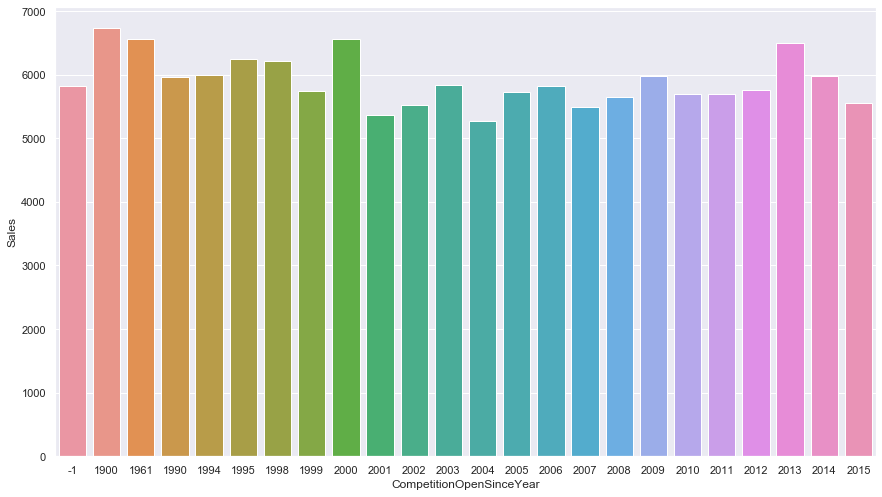

In [13]:
comp_year_sales = data.groupby("CompetitionOpenSinceYear").mean()["Sales"].to_frame().reset_index()

sns.set(rc={'figure.figsize':(14.7,8.27)})
sns.barplot(comp_year_sales["CompetitionOpenSinceYear"], comp_year_sales["Sales"])

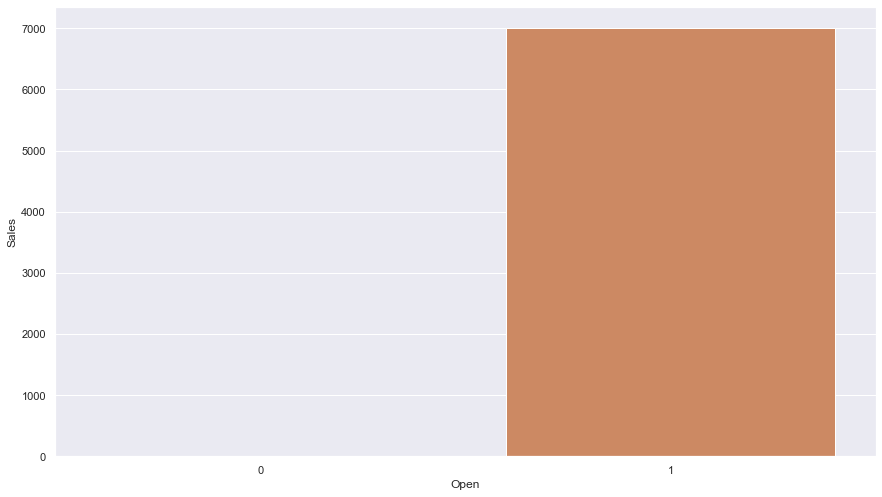

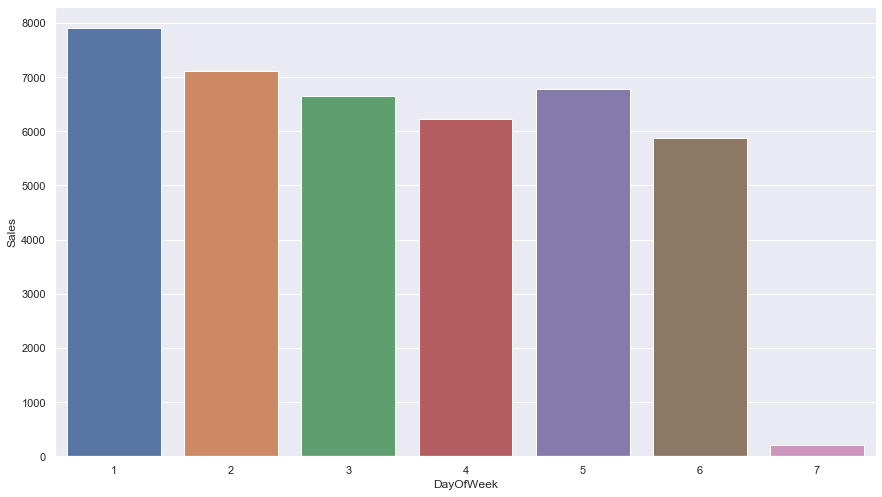

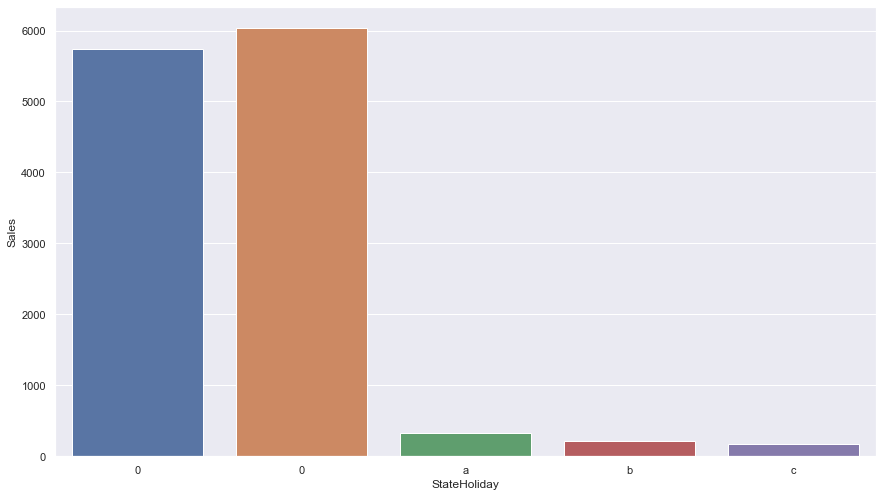

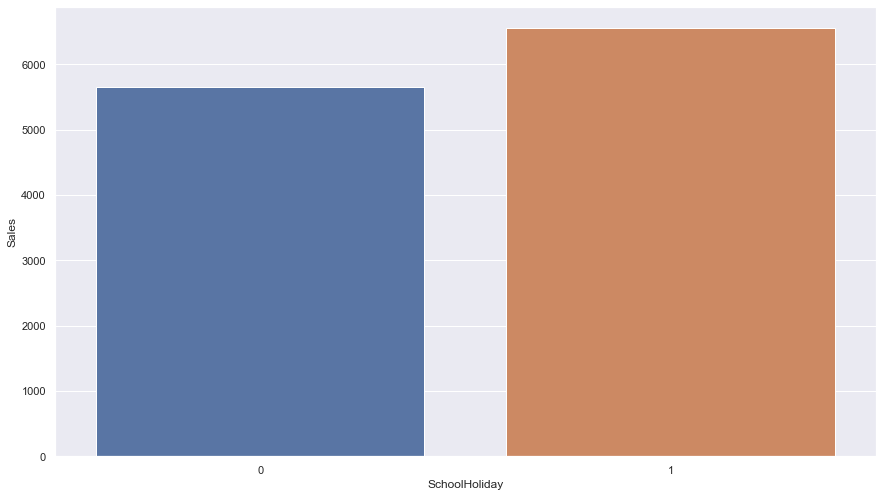

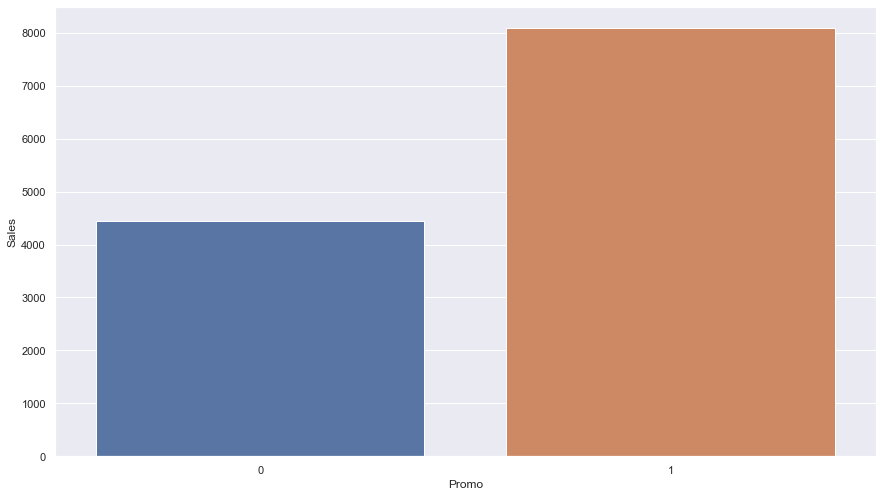

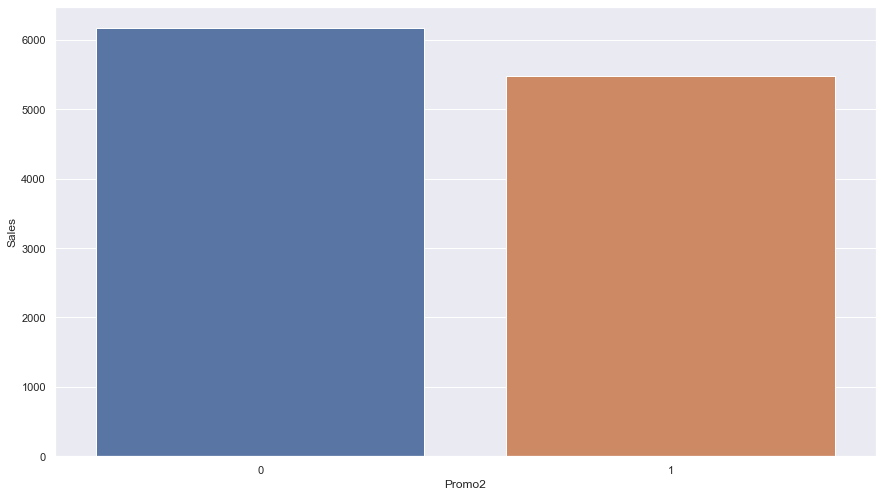

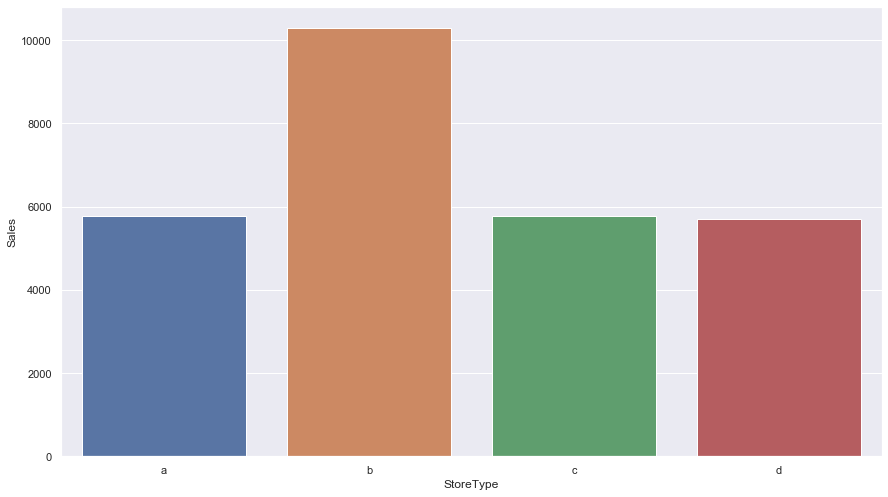

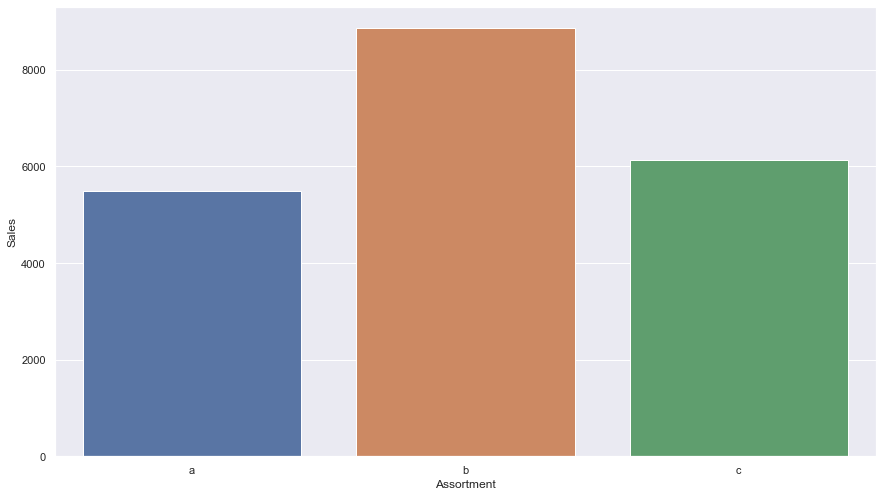

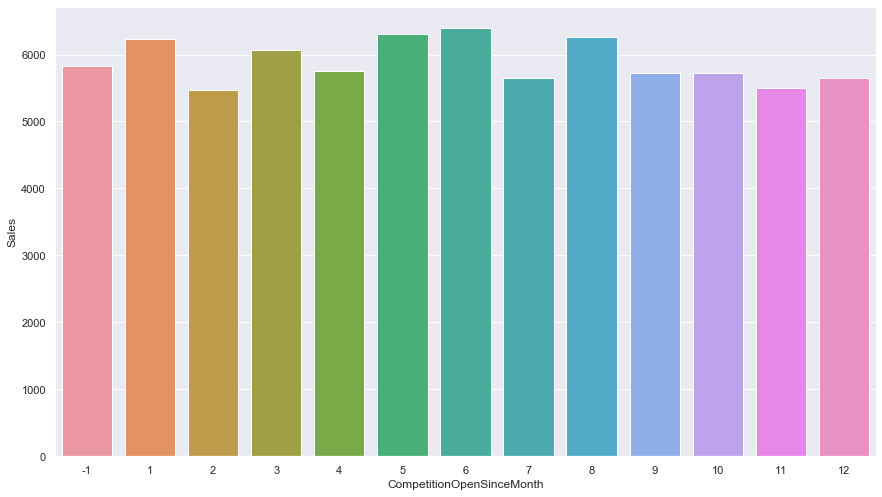

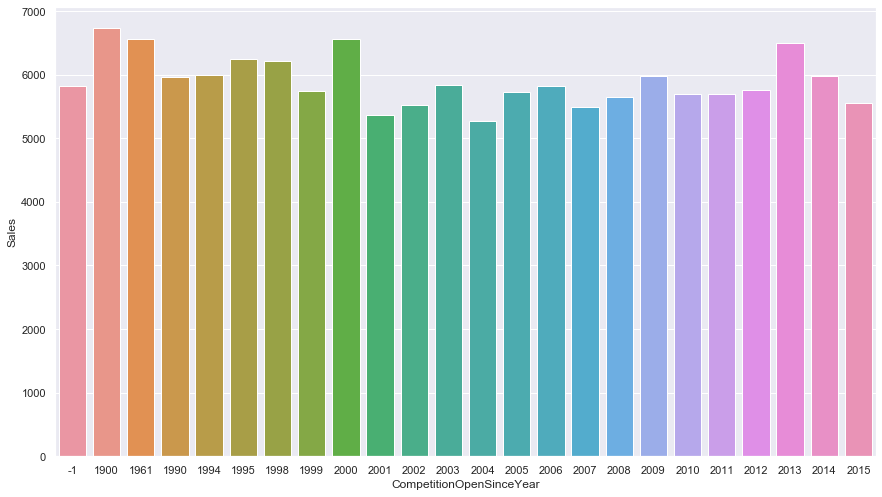

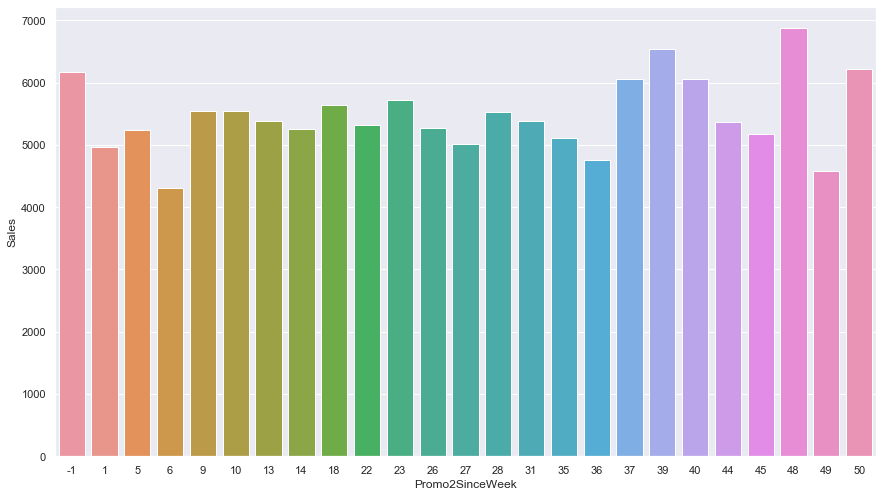

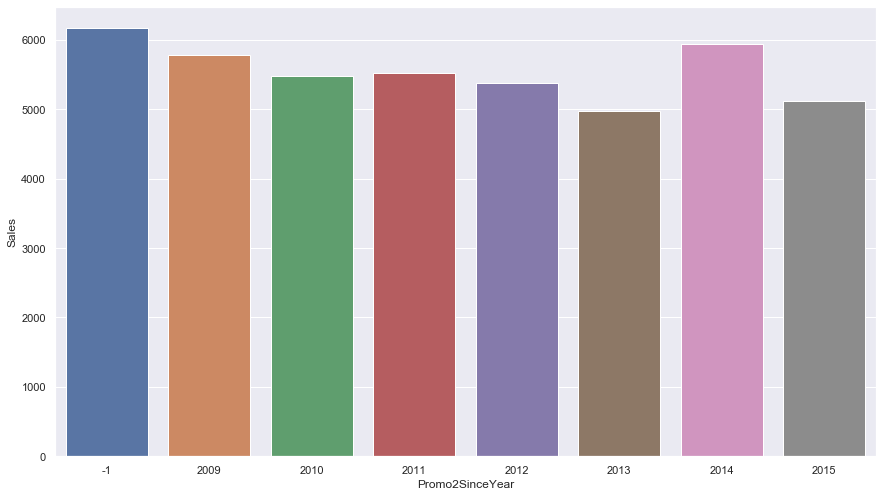

<Figure size 1058.4x595.44 with 0 Axes>

In [14]:
categoricals_to_graph = ["Open", "DayOfWeek", "StateHoliday", "SchoolHoliday", 
            "Promo", "Promo2", "StoreType", "Assortment", "CompetitionOpenSinceMonth",
            "CompetitionOpenSinceYear", "Promo2SinceWeek", "Promo2SinceYear"
           ]

for column in categoricals_to_graph: 
    column_year_sales = data.groupby(column).mean()["Sales"].to_frame().reset_index()
    sns.barplot(column_year_sales[column], column_year_sales["Sales"])
    plt.figure()


# Open/Closed -> high
# DayOfWeek -> medium
# Holiday -> medium